In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
data = open('wreath.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 100)           386500    
_________________________________________________________________
bidirectional (Bidirectional (None, 11, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 11, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1932)              195132    
_________________________________________________________________
dense_1 (Dense)              (None, 3865)              7471045   
Total params: 8,514,277
Trainable params: 8,514,277
Non-trainable params: 0
______________________________________________

In [4]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
521/521 [==============================] - 69s 133ms/step - loss: 7.0221 - accuracy: 0.0340
Epoch 2/100
521/521 [==============================] - 69s 132ms/step - loss: 6.5671 - accuracy: 0.0364
Epoch 3/100
521/521 [==============================] - 67s 128ms/step - loss: 6.3944 - accuracy: 0.0430
Epoch 4/100
521/521 [==============================] - 66s 127ms/step - loss: 6.2840 - accuracy: 0.0537
Epoch 5/100
521/521 [==============================] - 66s 126ms/step - loss: 6.2080 - accuracy: 0.0555
Epoch 6/100
521/521 [==============================] - 66s 127ms/step - loss: 6.1391 - accuracy: 0.0588
Epoch 7/100
521/521 [==============================] - 65s 125ms/step - loss: 6.0672 - accuracy: 0.0599
Epoch 8/100
521/521 [==============================] - 67s 128ms/step - loss: 5.9893 - accuracy: 0.0636
Epoch 9/100
521/521 [==============================] - 66s 127ms/step - loss: 5.8921 - accuracy: 0.0697
Epoch 10/100
521/521 [==============================] - 66s 127m

521/521 [==============================] - 64s 124ms/step - loss: 1.9300 - accuracy: 0.6471
Epoch 80/100
521/521 [==============================] - 64s 122ms/step - loss: 1.8938 - accuracy: 0.6578
Epoch 81/100
521/521 [==============================] - 64s 124ms/step - loss: 1.8800 - accuracy: 0.6561
Epoch 82/100
521/521 [==============================] - 64s 123ms/step - loss: 1.8592 - accuracy: 0.6640
Epoch 83/100
521/521 [==============================] - 69s 132ms/step - loss: 1.8305 - accuracy: 0.6668
Epoch 84/100
521/521 [==============================] - 65s 126ms/step - loss: 1.8178 - accuracy: 0.6698
Epoch 85/100
521/521 [==============================] - 66s 126ms/step - loss: 1.7890 - accuracy: 0.6730
Epoch 86/100
521/521 [==============================] - 66s 127ms/step - loss: 1.7553 - accuracy: 0.6845
Epoch 87/100
521/521 [==============================] - 68s 130ms/step - loss: 1.7413 - accuracy: 0.6841
Epoch 88/100
521/521 [==============================] - 66s 127ms/st

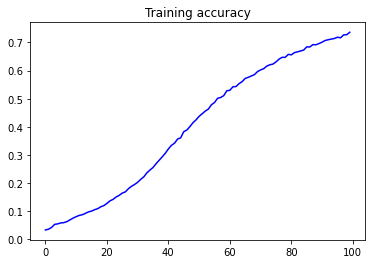

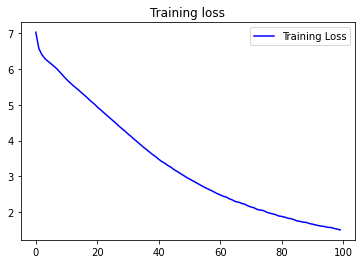

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
seed_text = "Worst in this royal presence may I speak"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Worst in this royal presence may I speak in all now thou wilt hate day this land was guilty of arm or suppose the father even to my life on him from your condition ' he as lord how came from thee them wilt can from battle in all guilty nay by good men may hate your throat i hate the people now for it thus made it thus at me in the death bed is thy tent and much from your brothers in fortune day your weeping land was pure little king by order even this painting angel my life be scorn at some men made it
